In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.style.use('ggplot')

# 2019 Elections in Ukraine
<hr>

In [132]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [134]:
elections2019 = pd.read_excel("elections2019.xlsx")
zno2018 = pd.read_excel("zno2018.xlsx")

zno2018.Region = [x.split(" ")[0] for x in zno2018.Region]

In [135]:
combinedData = pd.merge(elections2019, zno2018, on="Region")

### Dataset:

In [136]:
combinedData

,Region,Zelenskiy,Poroshenko,2018,2017,2016,AverageZno
0,Вінницька,23.42,22.37,138.0,136.7,136.8,137.166667
1,Волинська,21.63,18.98,139.8,137.4,136.7,137.966667
2,Дніпропетровська,45.34,8.32,136.3,135.0,135.2,135.500000
3,Донецька,24.74,12.64,134.9,135.0,135.7,135.200000
4,Житомирська,27.83,15.94,136.5,135.2,134.3,135.333333
5,Закарпатська,38.35,11.41,129.2,128.4,128.2,128.600000
6,Запорізька,39.75,8.76,134.3,134.0,133.8,134.033333
7,Івано-Франківська,16.07,21.30,139.2,137.6,136.9,137.900000
8,Київська,30.86,18.56,137.1,135.4,135.9,136.133333
9,Кіровоградська,34.52,11.79,135.6,133.5,134.1,134.400000


In [137]:
def makeChart(combinedData, candidate):
    X= combinedData.AverageZno.values.reshape(-1, 1)  # values converts it into a numpy array
    Y= combinedData[candidate].values.reshape(-1, 1)  # values converts it into a numpy array
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    
    corr = np.corrcoef(combinedData.AverageZno, combinedData[candidate])[1][0]

    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(111)
    ax.scatter(X, Y, color = "green", s=35)
    ax.plot(X, Y_pred, color='steelblue')
    ax.set_xlabel("ZNO result", size=20)
    ax.set_ylabel(candidate + " %", size=20)
    ax.set_title(candidate, size=25)
    
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15)

    text = "Corr=" + str(round(corr, 2))
    ax.text(combinedData.AverageZno.min(), np.percentile(combinedData[candidate], 99), text, fontsize=25, color="m")
    
    plt.show()

<hr>
## Check on dependency between ZNO results and elections results in each region.
### For Each candidate

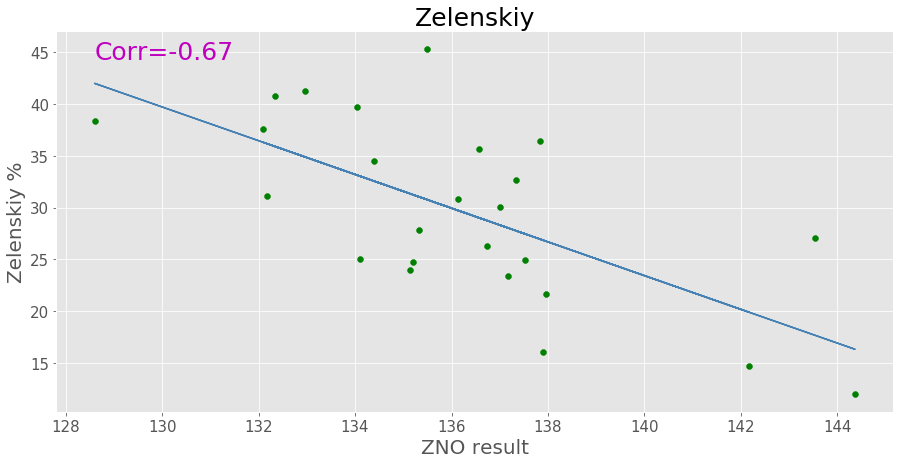

In [138]:
makeChart(combinedData=combinedData, candidate="Zelenskiy")

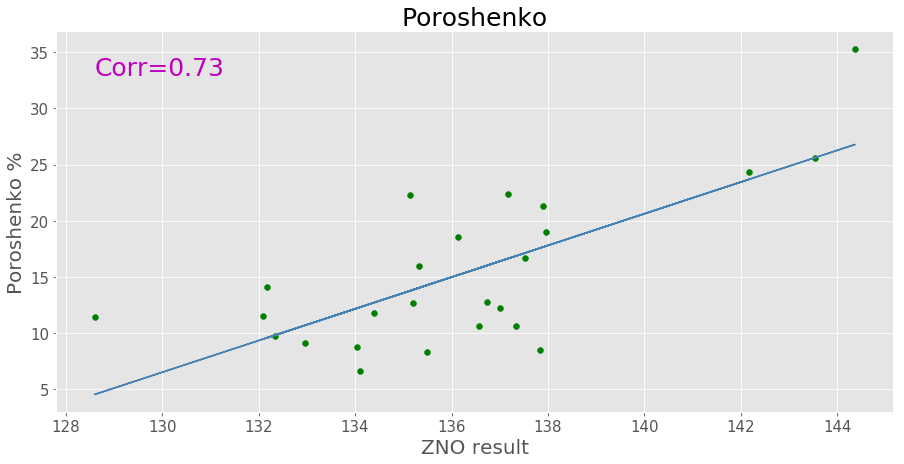

In [139]:
makeChart(combinedData=combinedData, candidate="Poroshenko")